# Analiza EDA (Exploratory data analysis) w języku Python. Część 1.

## Czym jest EDA ?

Eksploracyjna analiza danych popularnie znana jako EDA to proces przeprowadzania wstępnych badań zbioru danych w celu odkrycia struktury i zawartości danego zbioru danych. Jest często znany jako profilowanie danych. Jest to nieunikniony krok w całościowym procesie analizy danych od zrozumienia danych na poziomie biznesowym do wdrożenia stworzonych modeli.
EDA to procesy, dzięki którym uzyskujemy podstawową wiedzę na temat danych, która następnie pomaga nam w dalszym procesie czyszczenia i przygotowywania danych.

### 1. Eksploracja danych opisowych.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# ten rodzaj importu nie będzie działał poprawnie, jeżeli użyjemy go w skrypcie
%matplotlib inline
import seaborn as sns

In [7]:
# wczytanie danych, zwróć uwagę na poprawność ścieżki oraz ustalenie innego separatora niż domyślny (,)
df = pd.read_csv(r'data/diabetes.csv')

# wyświetlamy pierwsze 5 wierszy (wartość domyślna)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# lub n ostatnich
df.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Ramka danych (obiekt typu DataFrame) posiada wiele parametrów, które są okreslane w po wczytaniu danych. Między innymi:

In [9]:
# liczbę obserwacji i zmiennych ramki w postaci krotki - kolumna z indeksem nie jest wliczana do tej liczby
df.shape

(768, 9)

Każda kolumna w ramce danych ma przypisany typ danych, który dobierany jest automatycznie na podstawie danych lub może być określony w trakcie tworzenia ramki lub w procesie konwersji danych już po jej zainicjowaniu. Przypisane typy możemy wyświetlić poprzez odwołanie się do atrybuty `dtypes`. Ta informaca jest również przydatna w celu ewentualnej optymalizacji zużycia pamięci przez dane ramki gdyż pandas nie zawsze wybiera najbardziej optymalny typ pod tym kątem. Jest to tym bardziej istotne im więcej kolumn z brakującymi danymi (ang. `missing values`) występuje w danych, gdyż nawet jedna taka wartość w kolumnie powoduje automatyczne przypisanie typu `float` do jej danych.

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Metoda [`count`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html) zwraca liczebność wartości niepustych (non-missing) w każdej kolumnie. Definicja wartości brakujących w pakiecie pandas opisana jest m.in. tu: https://pandas.pydata.org/docs/user_guide/missing_data.html

In [11]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

### 2. Statystyki opisowe

Pandas pozwala również na wyświetlenie całej gamy statystyk całej ramki danych. Używamy do tego celu metody [`describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html).
Otrzymujemy następujące cechy zmiennych liczbowych, a mianowicie zliczanie (liczba niebrakujących wartości), średnią, odchylenie standardowe i 5-punktowe podsumowanie, które obejmuje minimum, pierwszy kwartyl, drugi kwartyl, trzeci kwartyl i maksimum.

In [15]:
df.describe()
# sprawdź jaki typ danych zwracany jest przez tę metodę

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Podając argument `include` i przypisując mu wartość `"all"`, otrzymujemy również podsumowanie zmiennych kategorycznych. Dla zmiennych kategorycznych otrzymujemy cechy: count (liczba niepustych wartości), unique (liczba unikalnych wartości), top (najczęstsza wartość) i częstotliwość najczęstszej wartości.

In [16]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Kolejną przydatną metodą klasy DataFrame jest metoda `info()`, która wyświetla dane w postaci:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dzięki tej metodzie możemy również dowiedzieć się o przybliżonej ilości zajmowanej pamięci RAM przez dane w ramce.

### 3. Czyszczenie i wstępna transformacja danych.

#### 3.1 Obsługa wartości brakujących

Mając informacje pozyskane w poprzednim podrozdziale wiemy już gdzie występują wartości brakujące. W zależności od typu danych, założeń projektu możemy je obsłużyć na wiele sposobów. Możemy usunąć zmienną lub obserwację albo wypełnić je danymi. Usunięcie obserwacji z brakującymi danymi możemy wykonać np. za pomocą metody [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

In [18]:
# pakiet numpy oraz wykorzystujący go do przechowywania danych pakiet pandas posiadają szereg funkcji, które tworzą tzw. maski. Są to maski logiczne, które w zależności od użytego warunku oznaczają każdy punkt danych wartością True lub False co może być później wykorzystane przez kolejne funkcje wykonujące kolejne działania w zależności od wartości w danym miejscu (można to sobie wyobrazić również jak filtr). Jedną z takich funkcji jest funkcja isna(), która może być wykorzystywane w procesie obsługi wartości brakujących.
df.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [19]:
# możemy również ocenić ile procent wartości w każdej kolumnie stanowią wartości brakujące
df.isna().sum()/df.shape[0]

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [20]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


>Dlaczego informacja o wartościach brakujących się nie zmieniła ? Większość metod przekształcających ramkę danych nie przekształca oryginalnej ramki, ale zwraca nowy obiekt DataFrame z przekształconymi danymi. Odpowiada za to parametr `inplace`, które domyślna wartość zazwyczaj jest ustawiona na `False`. Spróbujmy więc jeszcze raz.

In [22]:
# kopia na potrzeby prezentacji
df_dropped = df.copy()
df_dropped.dropna(inplace=True)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Teraz wszystko się zgadza. Taka metoda jest jednak dość destrukcyjnym podejściem dla naszych danych, gdzie z początkowej liczby 550068 obserwacji zostało tylko 166821. Metoda `dropna()` posiada również dodatkowe parametry, które pozwalają określić czy usuwane będą wiersze i/lub kolumny z brakującymi danymi (`axis`), możemy określić minimalny próg ilości brakujących wartości w kolumnie/wierszu (`thresh`) lub warunek usuwania wiersza/kolumny (`how`). Poprzez zmienną subset możemy wskazać kolumny, dla którym metoda ma być zastosowana zamiast dla całej ramki. Przeanalizuj dokumentację metody `dropna` podlinkowaną w jednej z ramek powyżej. Metody w dokumentacji pakietu pandas opatrzone są również przykładami obrazującymi niektóre ich możliwości.

Usunięcie zmiennej (kolumny) ma tym większy sens im więcej jest wartości brakujących wśród jej danych. Z analizy procentowej zawartości wartości brakujących wynika, że zmienna `Product_Category_3` posiada blisko 70% wartości brakujących. W tym przypadku sensownym będzie usunięcie tej zmiennej z ramki.

In [24]:
# metoda drop może służyć do usuwania wielu zmiennych jednocześnie, gdyż może przyjmować sekwencję nazw kolumn jako argument
# w tym trybie usunięcie nie zadziała po ponownym uruchomieniu komórki
df.drop(columns=['Age'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


Innym podejściem jest zamiana wartości brakujących na wskazaną wartość. Sposobów na osiągnięcie tego efektu jest wiele, ale opisanych zostanie kilka wybranych. Rozpoczniemy od metody [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

In [25]:
# wypełniamy każdą wartość w ramce (celowy brak trybu inplace)
df.fillna(0).head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1
5,5,116,74,0,0,25.6,0.201,0
6,3,78,50,32,88,31.0,0.248,1
7,10,115,0,0,0,35.3,0.134,0
8,2,197,70,45,543,30.5,0.158,1
9,8,125,96,0,0,0.0,0.232,1


In [31]:
# kopia na potrzeby przykładu
df_copy = df.copy()
# tylko dla wybranej kolumny w ramce
df_copy['Pregnancies'].fillna(0).head(10)
# możemy wykonać tę operację "w miejscu"
df_copy['Pregnancies'].fillna(0, inplace=True)
df_copy['Pregnancies'].head(10)
# lub taką przekształconą kolumnę wstawić w miejsce istniejącej kolumny
# df_copy['Product_Category_2'] = df['Product_Category_2'].fillna(0)

0     6
1     1
2     8
3     1
4     0
5     5
6     3
7    10
8     2
9     8
Name: Pregnancies, dtype: int64

W tym konkretnym przypadku kolumna `Product_Category_2` jest kolumną kategoryczną, więc najrozsądniejsze będzie uzupełnienie jej wartościami najczęstszymi (moda).

In [32]:
df.Pregnancies.mode() # pd.Series
df['Pregnancies'].fillna(df.Pregnancies.mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


Jeżeli proste wypełnienie z góry określoną wartością nie jest odpowiednie dla naszych danych to możemy użyć jednej z dostępnych metod wewnątrz `fillna`. Pozwalają one na uzupełnianie napotkanych wartości nieznanych wartościami z poprzednich lub następnych napotkanych niepustych wartości. Przykład znajdziesz w dokumentacji.

Kolejną wartą uwagi metodą jest [`interpolate`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html). Metoda ta może używać kilku dostępnych wartości parametru `method` do określenia sposobu w jaki wartości zostaną zastąpione.

In [33]:
s = pd.Series([0, 1, np.nan, 3, 5, np.nan, 8])
s.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
4    5.0
5    6.5
6    8.0
dtype: float64

In [35]:
s = pd.Series([n**2 for n in range(1, 21)])
s.iloc[2:-1] = np.nan
s.interpolate()

0       1.0
1       4.0
2      26.0
3      48.0
4      70.0
5      92.0
6     114.0
7     136.0
8     158.0
9     180.0
10    202.0
11    224.0
12    246.0
13    268.0
14    290.0
15    312.0
16    334.0
17    356.0
18    378.0
19    400.0
dtype: float64

In [37]:
s.iloc[2:-1] = np.nan
s.interpolate(method='polynomial', order=2)

0       1.0
1       4.0
2       9.0
3      16.0
4      25.0
5      36.0
6      49.0
7      64.0
8      81.0
9     100.0
10    121.0
11    144.0
12    169.0
13    196.0
14    225.0
15    256.0
16    289.0
17    324.0
18    361.0
19    400.0
dtype: float64

Inne dość częste podejście polega na wypełnieniu brakujących wartości wartością średnią z danej kolumny. Można wykorzystać możliwości metody `fillna`, która również może przyjąć obiekt typu DataFrame jako wartość, z której wybrane zostaną wartości do wypełnienia missing values.

In [38]:
# wartość średnia zostanie zapisana do każdej brakujacej wartości w każdej kolumnie numerycznej
df.fillna(df.mean(numeric_only=True))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0
764,2,122,70,27,0,36.8,0.340,0
765,5,121,72,23,112,26.2,0.245,0
766,1,126,60,0,0,30.1,0.349,1


#### 3.2 Obsługa duplikatów 

W pierwszym etapie należy przeanalizować dane pod kątem duplikatów a w kolejnym je usunąć. Mówimy tu oczywiście o zduplikowanych obserwacjcha a nie wartościach cechy.

In [39]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

Na potrzeby przykładu możemy taki duplikat dodać.

In [40]:
df_duplicated = pd.concat([df.iloc[:5, :], df.iloc[:5, :]])
df_duplicated.reset_index()
df_duplicated.duplicated()

0    False
1    False
2    False
3    False
4    False
0     True
1     True
2     True
3     True
4     True
dtype: bool

Usunięcie duplikatów można wykonać za pomocą wbudowanej metody drop_duplicates()

In [41]:
df_duplicated.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [43]:
# lub tylko dla wybranej kolumny jeżeli istnieje taka potrzeba
df_duplicated.drop_duplicates("Glucose")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


Domyślnie zachowuje to tylko pierwsze wystąpienie zduplikowanej wartości w zmiennej `User_ID` i porzuca pozostałe.

#### 3.3 Obsługa wartości odstających.

Wartości odstające to skrajne wartości na niskiej i górnej skali danych.
Obsługa wartości odstających obejmuje 2 etapy: Wykrywanie i Leczenie wartości odstających.

**Wykrywanie wartości odstających**
W tym celu rozważamy dowolną zmienną z naszej ramki danych i określamy górne i dolne odcięcie za
pomocą dowolnej z 3 metod, a mianowicie:

* Metoda percentylowa
* Metoda IQR
* Metoda odchylenia standardowego

Rozważmy zmienną `Purchase`.

Teraz będziemy ustalać, czy w naszym zestawie danych są jakieś wartości odstające za pomocą metody
IQR ( Interquartile range ). Na czym polega ta metoda?
Znalezienie minimum (p0), maksimum (p100), pierwszego
kwartyla (q1), drugiego kwartyla (q2), trzeciego
kwartyla (q3) i iqr (zakresu międzykwartylowego ) wartości w zmiennej `Purchase`.

In [45]:
p0 = df.BMI.min()
p100 = df.BMI.max()
q1 = df.BMI.quantile(0.25)
q2 = df.BMI.quantile(0.5)
q3 = df.BMI.quantile(0.75)
iqr = q3-q1
# wynik
p0, p100, q1, q2, q3, iqr

(0.0, 67.1, 27.3, 32.0, 36.6, 9.3)

Teraz, mamy wszystkie wartości, których potrzebujemy, aby znaleźć dolne odcięcie (lc, ang. lower cut) i górne odcięcie (uc, ang. upper cut) wartości.

In [46]:
lc = q1 - 1.5* iqr
uc = q3 + 1.5 * iqr
lc, uc

(13.35, 50.550000000000004)

Mamy górne odcięcie i dolne odcięcie, co teraz?  
Będziemy korzystać z konwencji:  
Jeśli `lc < p0` → Na dolnej stronie NIE ma wartości odstających  
Jeśli `uc > p100` → NIE ma wartości odstających na wyższej stronie

Wyraźnie `lc < p0`, więc nie ma wartości odstających na dolnej stronie (min=12). Ale `uc < p100`
(max=23961), więc po wyższej stronie są wartości odstające. Możemy uzyskać obrazową
reprezentację wartości odstającej, rysując wykres „pudełkowy”.

<AxesSubplot:>

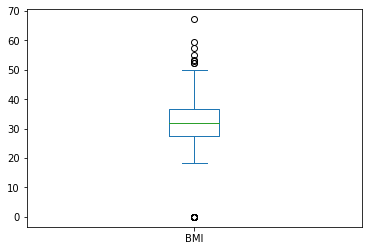

In [47]:
df.BMI.plot(kind='box')

Leczenie wartości odstających nie polega na ich usuwaniu, ale przycięciu do wcześniej wyliczonych przycięć górnych i dolnych.  
Przycinanie wszystkichwartości większych niż górne odcięcie do górnego odcięcia.

In [48]:
df.BMI.clip(upper=uc, inplace=True)

<AxesSubplot:>

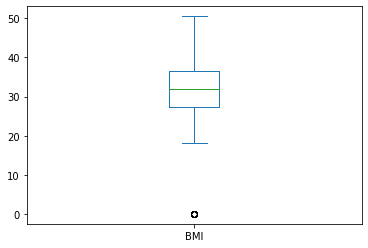

In [50]:
df.BMI.plot(kind='box')

### 4. Analiza jednowymiarowa.

W tego typu analizie używamy **pojedynczej zmiennej i kreślimy na niej wykresy**. Tutaj wykresy są tworzone po to, aby zbadać rozkład i skład danych w zależności od typu zmiennej - kategorycznej lub numerycznej.  

**Dla zmiennych ciągłych**: aby zobaczyć rozkład danych, tworzymy wykresy pudełkowe i histogramy.

<AxesSubplot:>

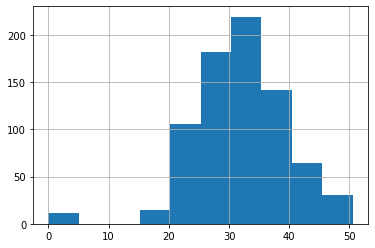

In [51]:
# histogram dla zmiennej Purchase
df.BMI.hist()

<AxesSubplot:ylabel='Frequency'>

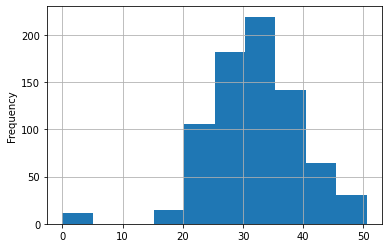

In [52]:
# lub z użyciem bardziej ogólnej metody plot()
df.BMI.plot(kind='hist', grid=True)

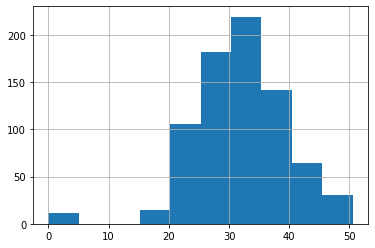

In [53]:
# lub z bezpośrednim użyciem pakietu matplotlib
plt.hist(df.BMI)
plt.grid(True)
# jeżeli nie korzystamy z trybu liniowego (ang. inline)
# plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x18d32d8b040>,
 'caps': [<matplotlib.lines.Line2D at 0x18d32d8b4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18d32d78d30>],
 'medians': [<matplotlib.lines.Line2D at 0x18d32d8ba60>],
 'fliers': [<matplotlib.lines.Line2D at 0x18d32d8bd30>],
 'means': []}

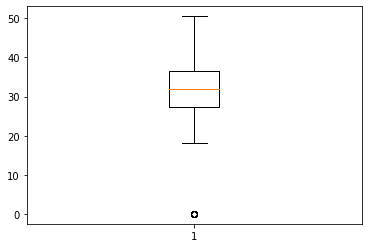

In [54]:
# i dla wykresu pudełkowego
plt.boxplot(df.BMI)

**Dla zmiennych kategorycznych**

Aby zobaczyć rozkład danych, tworzymy wykresy częstotliwości, takie jak wykresy słupkowe, poziome wykresy słupkowe itp.
Aby zobaczyć skład danych tworzymy wykresy kołowe.

<AxesSubplot:ylabel='BloodPressure'>

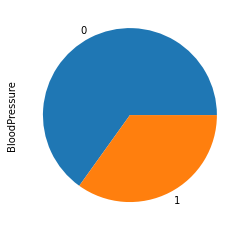

In [56]:
df.groupby('Outcome').BloodPressure.count().plot(kind='pie')

<AxesSubplot:xlabel='BloodPressure', ylabel='count'>

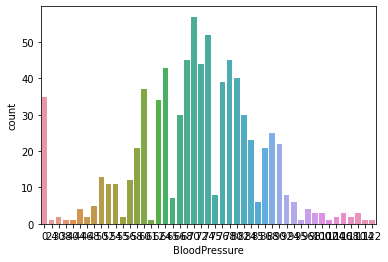

In [58]:
# tym razem seaborn
sns.countplot(x='BloodPressure', data = df)
# lub starym sposobem (niezalecane)
# sns.countplot(df.Marital_Status)

<AxesSubplot:ylabel='BloodPressure'>

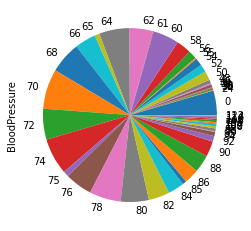

In [59]:
# skład danych kategoria miasta
df.groupby('BloodPressure').BloodPressure.count().plot(kind='pie')

<AxesSubplot:xlabel='BloodPressure', ylabel='count'>

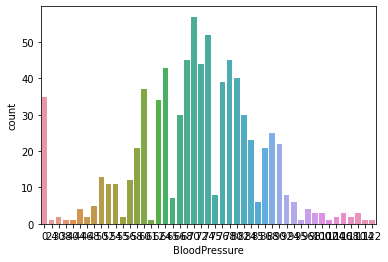

In [61]:
# rozkład wieku
sns.countplot(x='BloodPressure', data = df)

<AxesSubplot:ylabel='BloodPressure'>

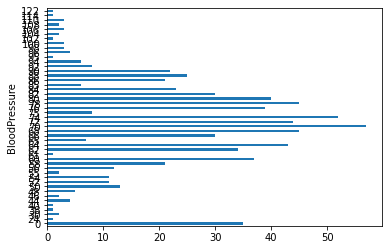

In [62]:
# dystrybucja kategorii produktu 1
df.groupby('BloodPressure').BMI.count().plot(kind='barh')

### 5. Analiza dwuwymiarowa

W tego typu analizie bierzemy dwie zmienne na raz i tworzymy na nich wykresy. Ponieważ mamy 2 typy
zmiennych, kategoryczne i numeryczne, więc mogą istnieć 3 przypadki w analizie dwuwymiarowej.  

#### 5.1 Numeryczne i numeryczne

Aby zobaczyć związek między 2 zmiennymi, tworzymy wykresy punktowe i
macierz korelacji z mapą cieplną na górze.

**Wykres punktowy**  
Ponieważ w naszym zestawie danych znajduje się tylko 1 zmienna ciągła, nie możemy tutaj utworzyć
wykresu punktowego. Ale jak możemy to zrobić? Weźmy hipotetyczny przykład taki, że uważamy
wszystkie zmienne liczbowe (mające `dtype` jako `int` lub `float` ) tutaj za zmienne liczbowe.

<AxesSubplot:xlabel='Insulin', ylabel='BMI'>

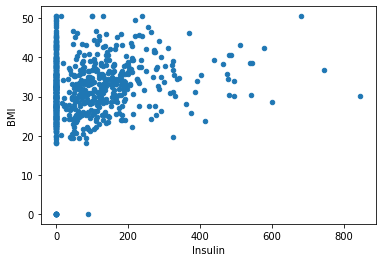

In [64]:
df.plot(x='Insulin',y='BMI', kind='scatter')

**Macierz korelacji**

In [65]:
# Znalezienie korelacji między wszystkimi zmiennymi liczbowymi.
df.select_dtypes(['int64','float64']).corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.023998,-0.033523,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.222319,0.137337,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281345,0.041265,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.390735,0.183928,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.199177,0.185071,0.130548
BMI,0.023998,0.222319,0.281345,0.390735,0.199177,1.000000,0.134771,0.292005
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.134771,1.000000,0.173844
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292005,0.173844,1.000000


<AxesSubplot:>

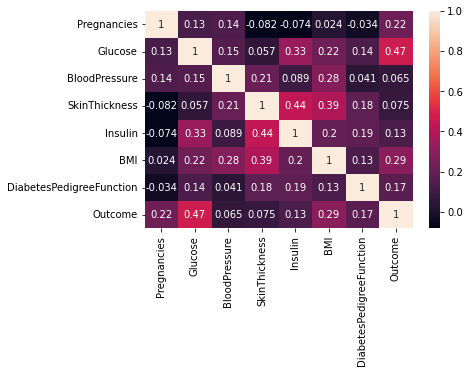

In [66]:
# i umieszczenie na odpowiednim wykresie
sns.heatmap(df.select_dtypes(['int64','float64']).corr(), annot=True)

#### 5.2 Numeryczne i kategoryczne.

Aby zobaczyć skład danych tworzymy wykresy słupkowe i liniowe.  
Aby zobaczyć porównanie 2 zmiennych, tworzymy wykresy słupkowe i liniowe.  
Porównanie `Purchase` i `Occupation` na wykresie słupkowym.

<AxesSubplot:xlabel='BMI'>

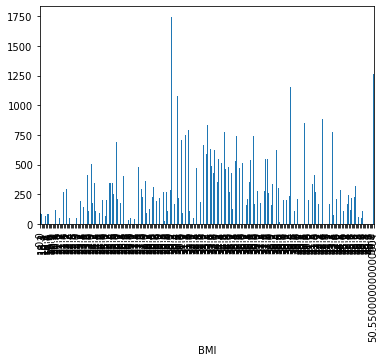

In [70]:
df.groupby('BMI').Insulin.sum().plot(kind='bar')

<BarContainer object of 242 artists>

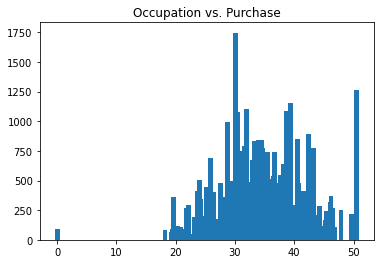

In [72]:
summary=df.groupby('BMI').Insulin.sum()
plt.title('Occupation vs. Purchase')
plt.bar(x=summary.index , height=summary.values)

In [ ]:
sns.barplot(summary.index , summary.values)

<AxesSubplot:xlabel='BMI'>

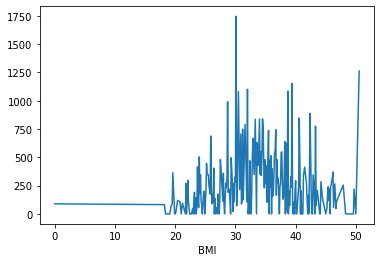

In [73]:
df.groupby('BMI').Insulin.sum().plot(kind='line')

<AxesSubplot:ylabel='BMI'>

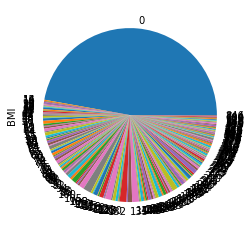

In [75]:
# skład zakupów w zależności od płci
df.groupby('Insulin').BMI.sum().plot(kind='pie')

<AxesSubplot:xlabel='BMI'>

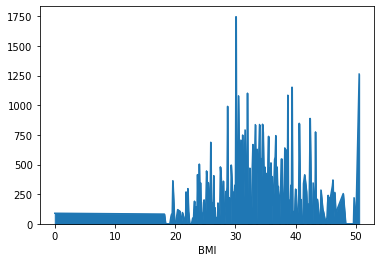

In [77]:
# porównanie zakupów i kategorii miasta - wykres warstwowy
df.groupby('BMI').Insulin.sum().plot(kind='area')

<AxesSubplot:ylabel='BMI'>

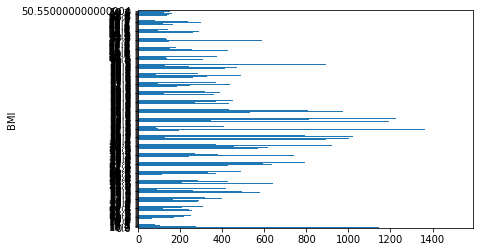

In [79]:
# Porównanie zakupu i Stay_In_Current_City_Years : poziomy wykres słupkowy
df.groupby('BMI').Glucose.sum ().plot(kind='barh')

<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

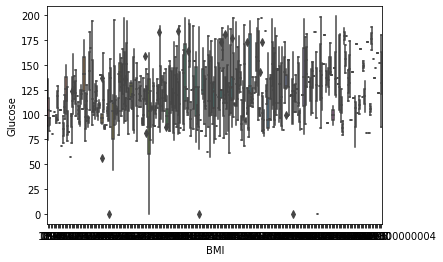

In [80]:
# porównanie zakupoów i stanu cywilnego
sns.boxplot(x='BMI', y='Glucose',data=df)

#### 5.3 Kategoryczne i kategoryczne

Aby zobaczyć związek między 2 zmiennymi, tworzymy tabelę przestawną i mapę cieplną.

In [81]:
# tworzenie tabeli przestawnej między wiekiem a płcią
pd.crosstab(df.BMI,df.Glucose)

Glucose,0,44,56,57,61,62,65,67,68,71,...,189,190,191,193,194,195,196,197,198,199
BMI,,,,,,,,,,,,,,,,,,,,,
0.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18.20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18.40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19.10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19.30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49.60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49.70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

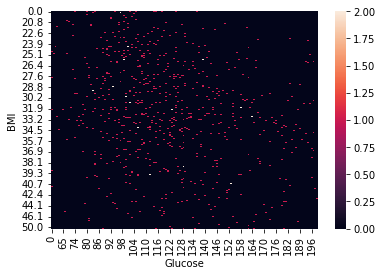

In [82]:
# mapa cieplna
sns.heatmap(pd.crosstab(df.BMI,df.Glucose))

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

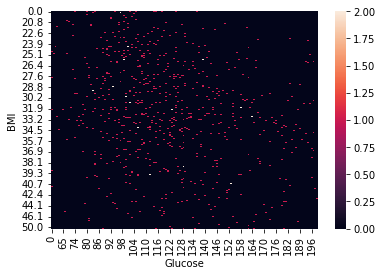

In [83]:
# związek między City_Category a Stay_In_Current_City_Years
sns.heatmap(pd.crosstab(df.BMI,df.Glucose))